# Project: Cats vs Dog Classification (Transfer Learning)

**Transfer Learning** is a deep learning technique where we use a pre-trained model. This pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset.

Transfer Learning gives higher accuracy compared to training models from scratch.

#### Examples of Pre-Trained Models:
* VGG-16
* ResNet50
* Inceptionv3
* MobileNet V2

## Work Flow

Dataset --> Image Processing --> Train Test Split --> Pretrained MobileNet Model

## 1. Extracting dataset using Kaggle API

In [1]:
# installing Kaggle library

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 2. Importing Datasets

In [3]:
# Kaggle api

!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:05<00:00, 154MB/s]
100% 812M/812M [00:05<00:00, 160MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# Extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# counting number of files in train folder

import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


### Printing the name of images

In [8]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.4142.jpg', 'dog.594.jpg', 'cat.382.jpg', 'cat.6207.jpg', 'cat.5518.jpg', 'dog.1982.jpg', 'dog.1256.jpg', 'dog.86.jpg', 'cat.5467.jpg', 'cat.7051.jpg', 'cat.6893.jpg', 'dog.6438.jpg', 'dog.5984.jpg', 'cat.841.jpg', 'dog.10365.jpg', 'dog.3020.jpg', 'cat.10304.jpg', 'dog.6492.jpg', 'cat.8433.jpg', 'cat.11033.jpg', 'dog.11686.jpg', 'cat.3756.jpg', 'dog.10401.jpg', 'dog.12057.jpg', 'dog.11947.jpg', 'dog.12337.jpg', 'cat.5073.jpg', 'dog.8911.jpg', 'dog.12412.jpg', 'cat.7863.jpg', 'cat.3865.jpg', 'cat.2231.jpg', 'dog.10040.jpg', 'dog.4630.jpg', 'cat.7859.jpg', 'dog.4256.jpg', 'cat.10854.jpg', 'cat.11455.jpg', 'dog.5512.jpg', 'cat.492.jpg', 'cat.7146.jpg', 'dog.6527.jpg', 'dog.8089.jpg', 'cat.9954.jpg', 'cat.8094.jpg', 'cat.5344.jpg', 'cat.4303.jpg', 'cat.2965.jpg', 'cat.6641.jpg', 'cat.5482.jpg', 'dog.11580.jpg', 'cat.8868.jpg', 'cat.8612.jpg', 'cat.4348.jpg', 'dog.8182.jpg', 'dog.2417.jpg', 'cat.5124.jpg', 'cat.7781.jpg', 'cat.3786.jpg', 'dog.11346.jpg', 'cat.2516.jpg', 'dog.9419.jpg',

## 3. Importing Libraries

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## 4. Displaying the images of dogs and cats

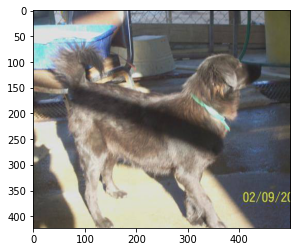

In [16]:
# display dog image

img = mpimg.imread('/content/train/dog.4142.jpg')

imgplt = plt.imshow(img)
plt.show()

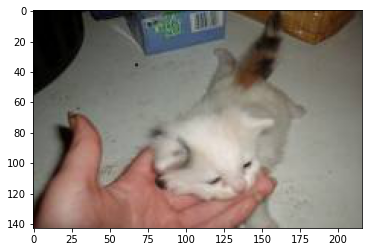

In [18]:
# display cat image

img = mpimg.imread('/content/train/cat.382.jpg')

imgplt = plt.imshow(img)
plt.show()

In [12]:
for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images: ',dog_count)
print('Number of cat images: ',cat_count)

dog
dog
cat
cat
cat
Number of dog images:  12500
Number of cat images:  12500


## 5. Resizing all the images

In [13]:
# creating a directory for resized images

os.mkdir('/content/image resized')

In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

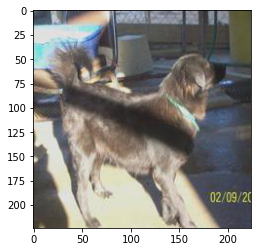

In [17]:
# display resized dog image

img = mpimg.imread('/content/image resized/dog.4142.jpg')

imgplt = plt.imshow(img)
plt.show()

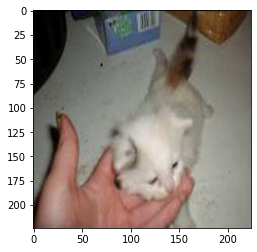

In [19]:
# display resized cat image

img = mpimg.imread('/content/image resized/cat.382.jpg')

imgplt = plt.imshow(img)
plt.show()

## 6. Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [20]:
# creating a for loop to assign labels

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['dog.4142.jpg', 'dog.594.jpg', 'cat.382.jpg', 'cat.6207.jpg', 'cat.5518.jpg']
2000


In [22]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 0]
2000


In [23]:
# counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 986 1014]


## 6. Converting all the resized images to numpy arrays

In [24]:
import cv2
import glob

In [27]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dog_cat_images)

[[[[107  98  89]
   [119 110 101]
   [128 119 110]
   ...
   [ 45  75  76]
   [ 46  71  73]
   [ 44  69  71]]

  [[103  94  85]
   [113 104  95]
   [120 111 102]
   ...
   [ 49  79  80]
   [ 50  75  77]
   [ 49  74  76]]

  [[ 96  87  78]
   [104  95  86]
   [109 100  91]
   ...
   [ 52  82  83]
   [ 55  80  82]
   [ 54  79  81]]

  ...

  [[ 54  60  71]
   [ 54  63  73]
   [ 53  63  73]
   ...
   [ 82  66  60]
   [ 83  67  61]
   [ 84  68  62]]

  [[ 54  60  71]
   [ 53  62  72]
   [ 50  60  70]
   ...
   [ 82  66  60]
   [ 83  67  61]
   [ 85  69  63]]

  [[ 57  63  74]
   [ 54  63  73]
   [ 49  59  69]
   ...
   [ 84  68  62]
   [ 86  70  64]
   [ 89  73  67]]]


 [[[  1  61  37]
   [ 12  72  48]
   [ 23  83  59]
   ...
   [ 44  94  70]
   [ 42  92  68]
   [ 42  92  68]]

  [[  8  68  44]
   [ 16  76  52]
   [ 22  82  58]
   ...
   [ 39  89  65]
   [ 39  89  65]
   [ 38  88  64]]

  [[ 12  74  50]
   [ 17  79  55]
   [ 19  81  57]
   ...
   [ 40  89  67]
   [ 41  88  66]
   [ 40  87

In [29]:
type(dog_cat_images)

numpy.ndarray

In [30]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [31]:
X = dog_cat_images
y = np.asarray(labels)

## 7. Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


We have,

1600 --> training images

400 --> test images

## 8. Scaling the data

In [35]:
X_train_scaled = X_train / 255

X_test_scaled = X_test / 255

In [36]:
print(X_train_scaled)

[[[[0.99607843 1.         0.99215686]
   [0.99607843 1.         0.99215686]
   [0.99607843 1.         0.99215686]
   ...
   [0.61176471 0.41960784 0.24705882]
   [0.61960784 0.42745098 0.25490196]
   [0.62745098 0.43529412 0.2627451 ]]

  [[0.99607843 1.         0.99215686]
   [0.99607843 1.         0.99215686]
   [0.99607843 1.         0.99215686]
   ...
   [0.60784314 0.41568627 0.24313725]
   [0.61568627 0.42352941 0.25098039]
   [0.62352941 0.43137255 0.25882353]]

  [[0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.60392157 0.41176471 0.23921569]
   [0.61176471 0.41960784 0.24705882]
   [0.61960784 0.42745098 0.25490196]]

  ...

  [[0.89803922 0.82745098 0.76078431]
   [0.89411765 0.82352941 0.75686275]
   [0.88627451 0.81568627 0.74901961]
   ...
   [0.71764706 0.66666667 0.6745098 ]
   [0.71372549 0.6627451  0.67058824]
   [0.70980392 0.65882353 0.66666667]]

  [[0.89803922 0.82745098 0.76078431]
   [0.8

## 9. Creating the Neural Network

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [38]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)

In [39]:
num_of_classes = 2

model = tf.keras.Sequential([
    
      pretrained_model,
      tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(
    
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']

)

In [41]:
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
50/50 [==============================] - 38s 682ms/step - loss: 0.2017 - acc: 0.9200
Epoch 2/10
50/50 [==============================] - 34s 679ms/step - loss: 0.0635 - acc: 0.9831
Epoch 3/10
50/50 [==============================] - 35s 703ms/step - loss: 0.0483 - acc: 0.9856
Epoch 4/10
50/50 [==============================] - 34s 677ms/step - loss: 0.0387 - acc: 0.9850
Epoch 5/10
50/50 [==============================] - 34s 681ms/step - loss: 0.0311 - acc: 0.9919
Epoch 6/10
50/50 [==============================] - 34s 677ms/step - loss: 0.0254 - acc: 0.9944
Epoch 7/10
50/50 [==============================] - 35s 697ms/step - loss: 0.0206 - acc: 0.9962
Epoch 8/10
50/50 [==============================] - 34s 677ms/step - loss: 0.0176 - acc: 0.9975
Epoch 9/10
50/50 [==============================] - 34s 673ms/step - loss: 0.0154 - acc: 0.9994
Epoch 10/10
50/50 [==============================] - 35s 699ms/step - loss: 0.0133 - acc: 0.9987


In [42]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss = ',score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 10s 686ms/step - loss: 0.0731 - acc: 0.9750
Test Loss =  0.07306045293807983
Test Accuracy =  0.9750000238418579


## 10. Predictive System

Path of the image to be predicted: /content/dog.jpg


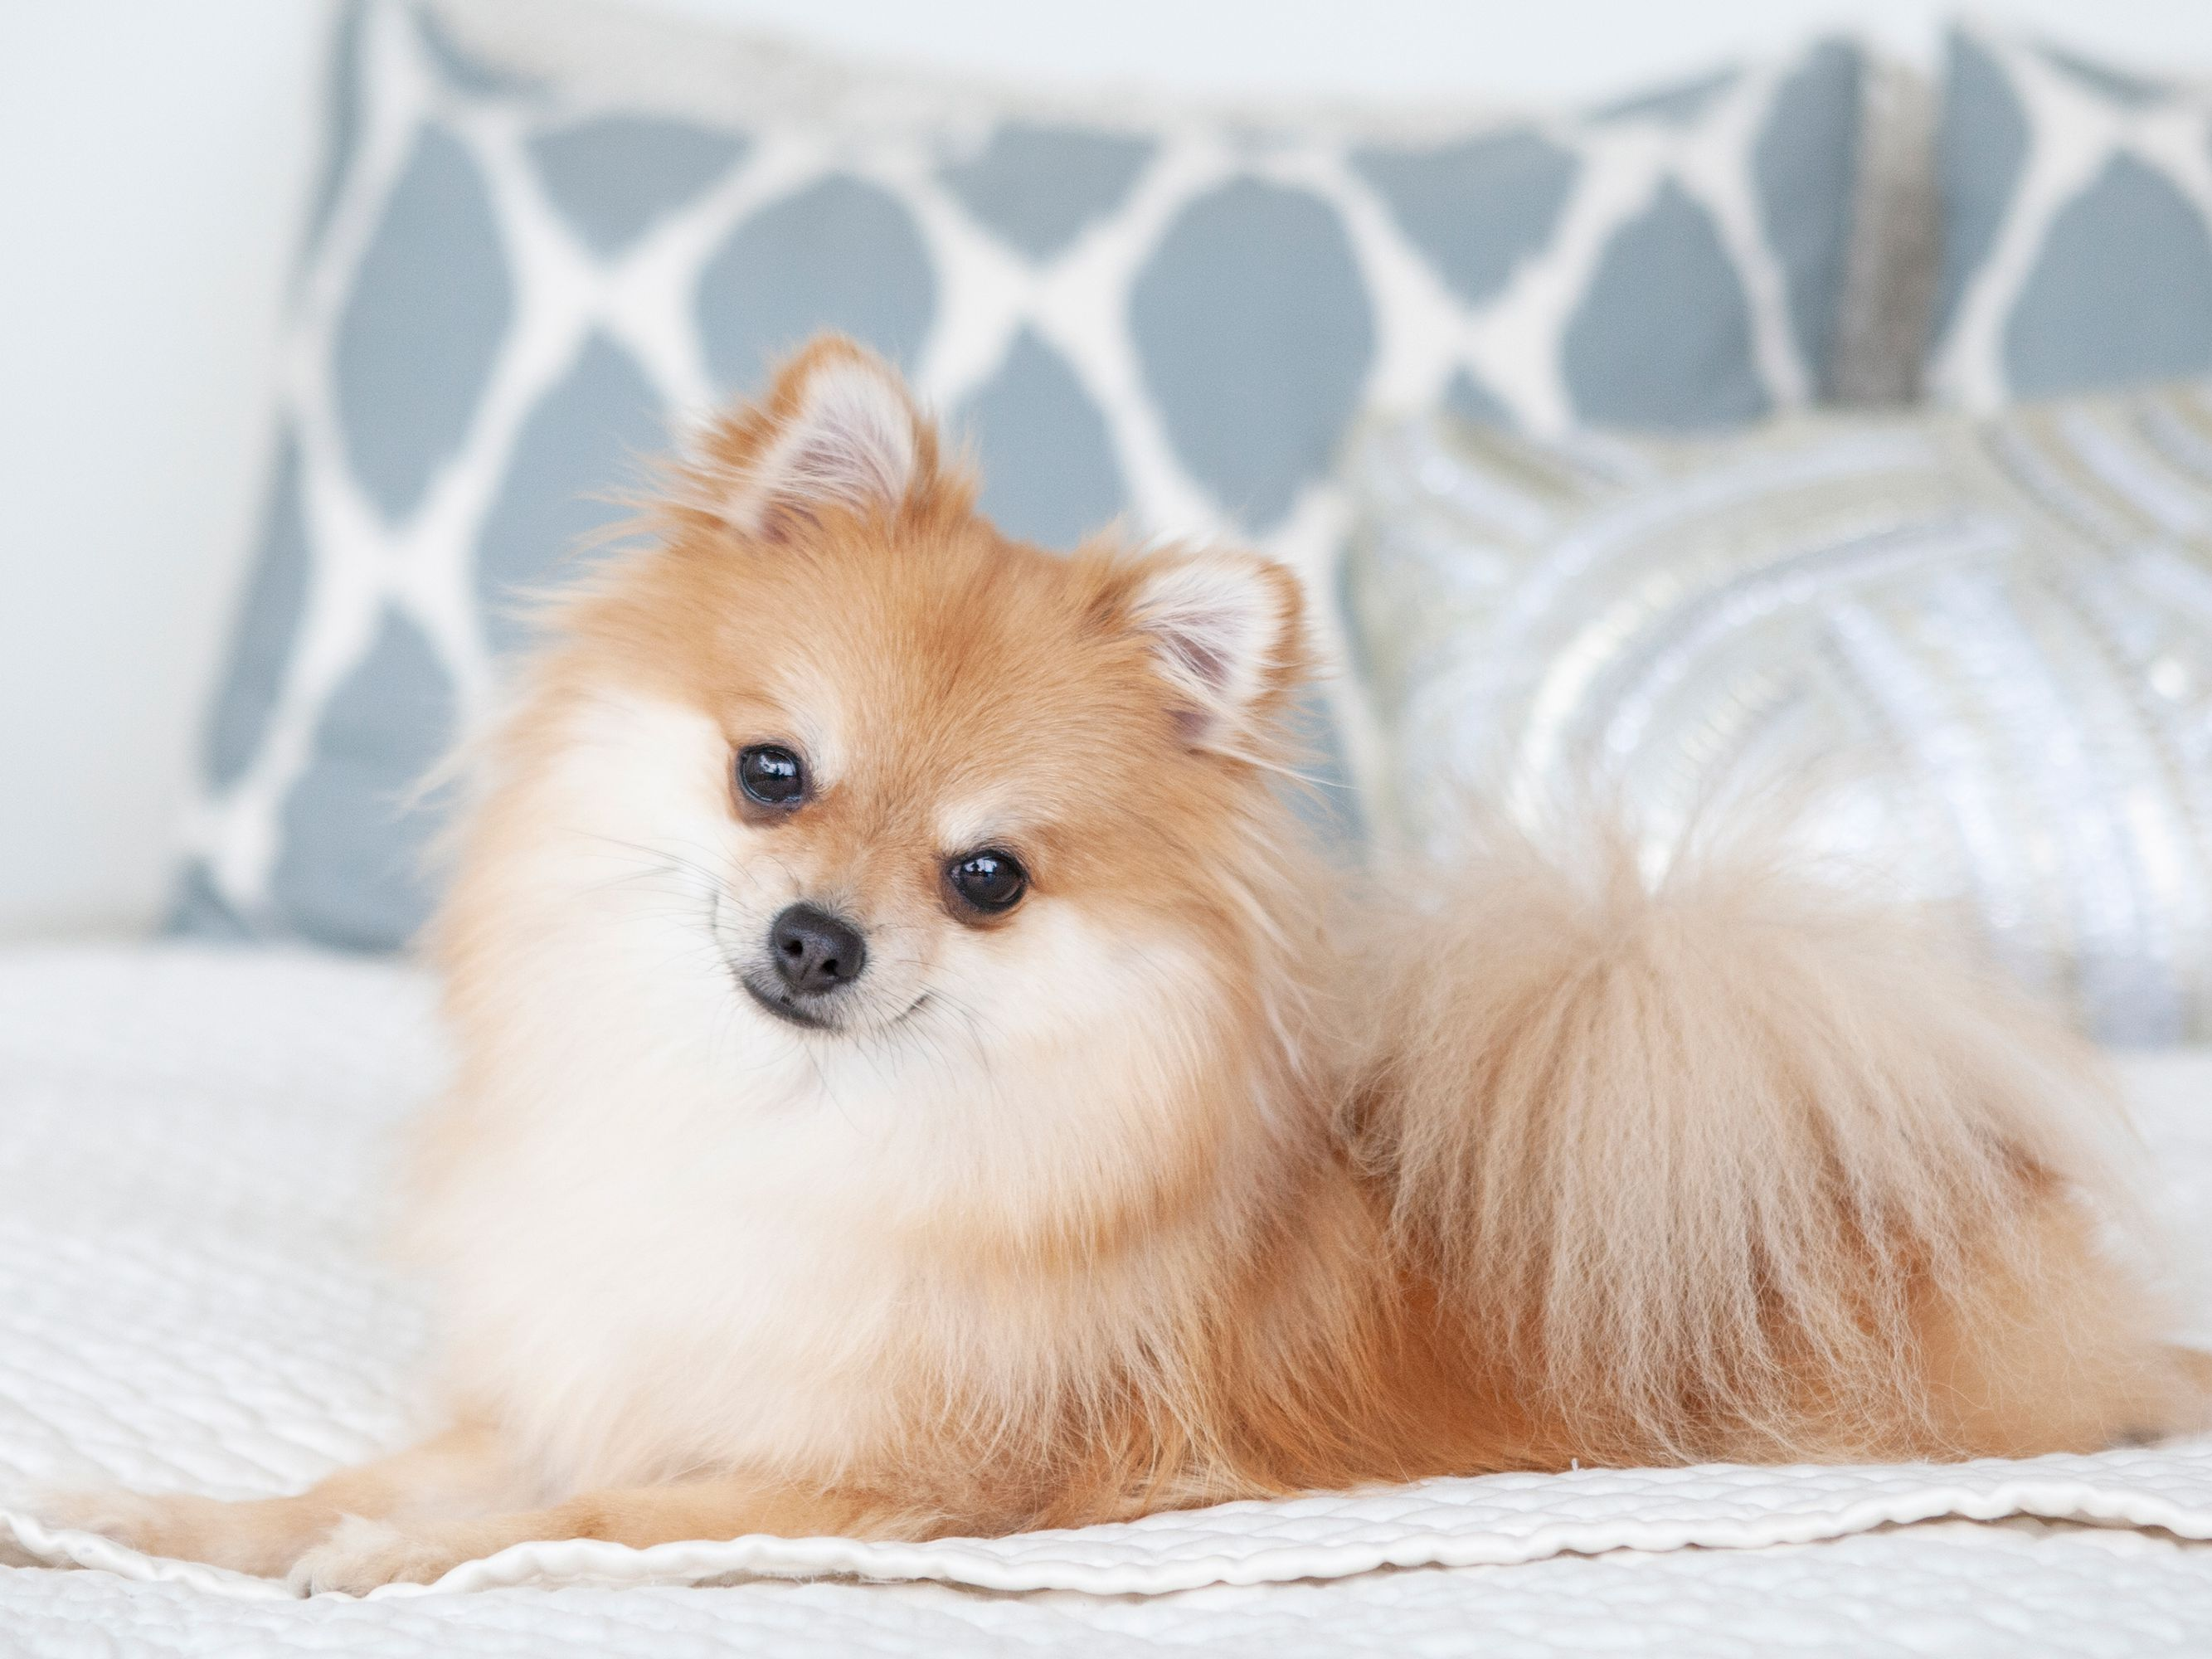

The image represents a dog


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize / 255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a cat')

else:
  print('The image represents a dog')